<a href="https://colab.research.google.com/github/arturbernardo/convolutionBlackAndWhite/blob/main/convolutional_matrix_bw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import scipy.signal
from PIL import Image, ImageFilter
import cv2
import numpy as np
import requests
from io import BytesIO

# KERNELS

In [2]:
kernel_edgedetection = np.matrix([[-1, -1, -1],
                                 [-1, 8.5, -1],
                                 [-1, -1, -1]])

In [3]:
blur = np.matrix([[0.08, 0.08, 0.08],
                  [0.08, 0.5, 0.08],
                  [0.08, 0.08, 0.08]])

In [4]:
edge = np.matrix([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])

In [5]:
horizontal_edges = np.matrix([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

In [6]:
vertical_edges = np.matrix([[ 1,  2,  1],
                            [ 0,  0,  0],
                            [-1, -2, -1]])

# IMAGEM DE ENTRADA

In [37]:
# url = "https://www.ufrgs.br/napead/projetos/historia-arte/imgs/idmod/Vermeer_11.jpg"
# url = "https://upload.wikimedia.org/wikipedia/en/thumb/1/17/Bugs_Bunny.svg/800px-Bugs_Bunny.svg.png"
url = "https://upload.wikimedia.org/wikipedia/en/5/50/RatatouillePoster.jpg"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}
response = requests.get(url, headers)
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    if image.mode in ('RGBA', 'LA') or (image.mode == 'P' and 'transparency' in image.info):
        # Conversão para evitar bug no PIL http://stackoverflow.com/a/1963146
        alpha = image.convert('RGBA').split()[-1]
        bg = Image.new("RGBA", image.size, (255, 255, 255, 255))
        bg.paste(image, mask=alpha)
        bg = bg.convert('RGB')
        bg = bg.convert('L')
        img_grey = bg
    else :
      img_grey = image.convert('RGB')
      img_grey = img_grey.convert('L')

    print("ok")
else:
    print("Status code:", response.status_code)


ok


# RESIZE para diminuir o trabalho do algoritmo

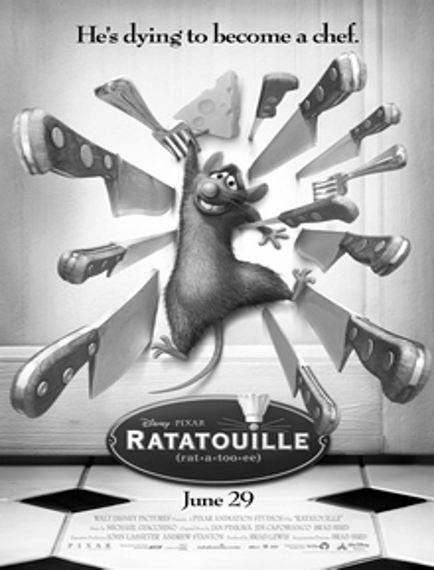

In [38]:
new_image = img_grey.resize((434, 570))
new_image

# CONVOLUÇÃO

In [39]:
matrix = np.array(new_image)

def reduce_matrix(to_be_reduced, kernel):
  b = np.sum(to_be_reduced[:,:]*kernel[:,:])
  return b

def apply_kernel(kernel):
  output=np.zeros(shape=(matrix.shape[0],matrix.shape[1]))

  for i in range(len(matrix)):
    for j in range(len(matrix[i])):
      if (i+1 >= matrix.shape[0]):
        break
      if (j+1 >= matrix.shape[1]):
        break
      pos_matrix = matrix[i-1:i+2,j-1:j+2]
      if (pos_matrix.size != 0):
        output[i, j] = reduce_matrix(pos_matrix, kernel)
      else:
        output[i, j] = 1
  return output

output_matrix = apply_kernel(vertical_edges) #kernel como parametro

In [40]:
output_matrix

array([[   1.,    1.,    1., ...,    1.,    1.,    0.],
       [   1.,  -12.,  -12., ...,   44.,   32.,    0.],
       [   1.,  -12.,  -16., ...,   32.,   28.,    0.],
       ...,
       [   1.,   72.,   96., ..., -228., -188.,    0.],
       [   1.,    8.,    8., ...,  -96.,  -84.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

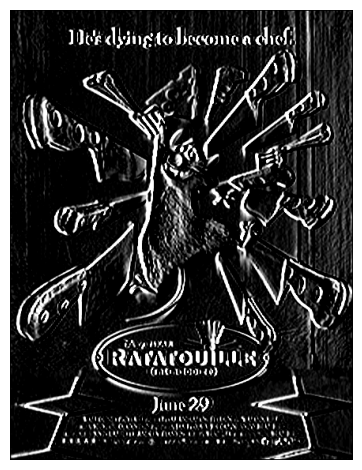

In [41]:
new_image = Image.fromarray(output_matrix)
# new_image.save("new_image.jpeg")
plt.imshow(new_image)


# plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

plt.axis("off")
plt.show()

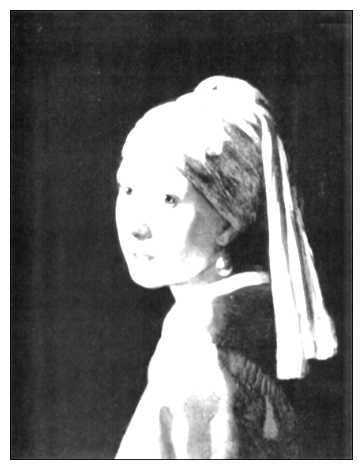

In [27]:
new_image = Image.fromarray(output_matrix)
# new_image.save("new_image.jpeg")
plt.imshow(new_image)


# plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

plt.axis("off")
plt.show()